In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import prince

In [ ]:
df_K = pd.read_excel('/DataBank.xlsx')

In [ ]:
df_K.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [ ]:
df_K.shape

(5000, 23)

In [ ]:
df_K.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

In [ ]:
df_K.isna().sum().sum() # no missing values

0

In [ ]:
df_K.duplicated().sum() # no duplicates

0

In [ ]:
# Target distribution
df_K.Default_On_Payment.value_counts(normalize=True)

0    0.701
1    0.299
Name: Default_On_Payment, dtype: float64

In [ ]:
df_K.Count.nunique()

1

In [ ]:
df_K.Customer_ID.nunique()

5000

- The "Count" column only takes one value equal to 1, so we will delete it.
- The "Customer_ID" column takes df_K.shape[0] distinct values, we will also delete it.

In [ ]:
df_K.drop(['Count', 'Customer_ID'], axis=1, inplace=True)

In [ ]:
df_K.duplicated().sum()

4000

By dropping the ID column which distinguishes the clients, we have 4/5 of the duplicated observations. By keeping it, the analysis would be biased because it would be the same observations with different IDs. We will therefore remove the duplicate values.

In [ ]:
df_K.drop_duplicates(keep='first', inplace=True)

In [ ]:
df_K.shape

(1000, 21)

By deleting the duplicate columns, we lose a lot of data (4/5 of the database)!

In [ ]:
df_K.dtypes

Status_Checking_Acc            object
Duration_in_Months              int64
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                   int64
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                  int64
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Property                       object
Age                             int64
Other_Inst_Plans               object
Housing                        object
Num_CC                          int64
Job                            object
Dependents                      int64
Telephone                      object
Foreign_Worker                 object
Default_On_Payment              int64
dtype: object

In [ ]:
df_K.describe()[1:].round(2)

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
mean,20.90,3271.26,2.97,2.84,35.55,1.41,1.16,0.30
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36,0.46
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00,0.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00,0.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00,0.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00,1.00


## Preprocessing

In [ ]:
# removing blank in variable name for better column manipulation
df_K.rename(columns = {'Other_Inst_Plans ':'Other_Inst_Plans'}, inplace = True)

In [ ]:
df_K.Default_On_Payment.value_counts()

0    701
1    299
Name: Default_On_Payment, dtype: int64

The proportion of defaults did not change from that obtained before deleting duplicates.

### Correlation

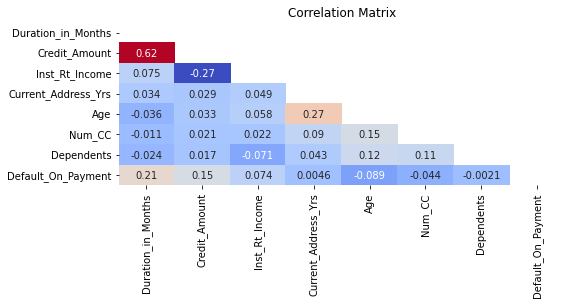

In [ ]:
corrmat = df_K.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,3))
sns.heatmap(df_K[top_corr_features].corr(),annot=True,cbar=False,cmap="coolwarm",
            mask=np.triu(np.ones_like(corrmat, dtype = bool))).set_title('Correlation Matrix');

Correlation is ok.

In [ ]:
# list of categorical variables
categori = []
for col in df_K.columns:
  if df_K[col].dtype == 'O':
    categori.append(col)

categori

['Status_Checking_Acc',
 'Credit_History',
 'Purposre_Credit_Taken',
 'Savings_Acc',
 'Years_At_Present_Employment',
 'Marital_Status_Gender',
 'Other_Debtors_Guarantors',
 'Property',
 'Other_Inst_Plans',
 'Housing',
 'Job',
 'Telephone',
 'Foreign_Worker']

In [ ]:
for col in categori:
    print(f"\033[1m {col}\033[0m has \033[1m{df_K[col].nunique()}\033[0m distinct values.") 

 Status_Checking_Acc has 4 distinct values.
 Credit_History has 5 distinct values.
 Purposre_Credit_Taken has 10 distinct values.
 Savings_Acc has 5 distinct values.
 Years_At_Present_Employment has 5 distinct values.
 Marital_Status_Gender has 4 distinct values.
 Other_Debtors_Guarantors has 3 distinct values.
 Property has 4 distinct values.
 Other_Inst_Plans has 3 distinct values.
 Housing has 3 distinct values.
 Job has 4 distinct values.
 Telephone has 2 distinct values.
 Foreign_Worker has 2 distinct values.


The Savings account/bonds variable takes the following modalities:
- A61: … < 1000 USD
- A62: 1000 <= … < 5000 USD
- A63: 5000 <= … < 10000 USD
- A64: .. >= 10000 USD
- A65: unknown/ no savings account

We are going to make a slight modification by replacing A65 by A60 in order to keep an ascending order.

In [ ]:
df_K['Savings_Acc'] = df_K['Savings_Acc'].replace(to_replace='A65', value='A60')

## MCA

In [ ]:
df_mca = df_K.copy()

In [ ]:
# list of numerical variables
numeric = []
for col in df_mca.columns:
  if df_K[col].dtype == 'int64':
    numeric.append(col)

numeric

['Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Current_Address_Yrs',
 'Age',
 'Num_CC',
 'Dependents',
 'Default_On_Payment']

In [ ]:
df_mca[numeric].head()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
0,6,1169,4,4,67,2,1,0
1,48,5951,2,2,22,1,1,0
2,12,2096,2,3,49,1,2,0
3,42,7882,2,4,45,1,2,0
4,24,4870,3,4,53,2,2,1


### Visualization of continuous variables

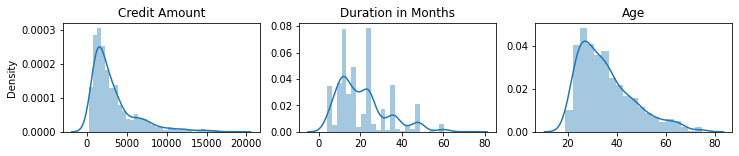

In [ ]:
fig,axes=plt.subplots(1,3, figsize=(12, 2))
sns.distplot(df_mca.Credit_Amount, hist = True, kde = True, ax=axes[0]).set_title('Credit Amount')
sns.distplot(df_mca.Duration_in_Months, hist = True, kde = True, ax=axes[1]).set_title('Duration in Months')
sns.distplot(df_mca.Age, hist = True, kde = True, ax=axes[2]).set_title('Age')
axes[1].set_ylabel(''), axes[2].set_ylabel('')
axes[0].set_xlabel(''), axes[1].set_xlabel(''), axes[2].set_xlabel('');

In [ ]:
df_mca[['Credit_Amount','Duration_in_Months','Age']].describe()[1:].round(2)

,Credit_Amount,Duration_in_Months,Age
mean,3271.26,20.90,35.55
std,2822.74,12.06,11.38
min,250.00,4.00,19.00
25%,1365.50,12.00,27.00
50%,2319.50,18.00,33.00
75%,3972.25,24.00,42.00
max,18424.00,72.00,75.00


### Categorization of quantitative variables

#### Continuous variables

In [ ]:
# Duration in Months
df_mca['Duration_in_Months'] = pd.cut(df_mca['Duration_in_Months'],
                                      bins=[0, 24, 48, 72],
                                      labels=['less than 2 years', '2-4 years', '4-6 years'])

# Credit Amount
df_mca['Credit_Amount'] = pd.cut(df_mca['Credit_Amount'],
                                 bins=[0, 5000, 10000, 20000],
                                 labels=['moderate', 'high', 'very high'])

# Age
df_mca['Age'] = pd.cut(df_mca['Age'],
                       bins=[0, 25, 55, 80],
                       labels=['young adult', 'adult', 'senior'])

In [ ]:
df_mca[numeric].head()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
0,less than 2 years,moderate,4,4,senior,2,1,0
1,2-4 years,high,2,2,young adult,1,1,0
2,less than 2 years,moderate,2,3,adult,1,2,0
3,2-4 years,high,2,4,adult,1,2,0
4,less than 2 years,moderate,3,4,adult,2,2,1


#### Discrete variables

In [ ]:
for col in df_mca.columns:
  df_mca[col] = df_mca[col].astype("O")

In [ ]:
df_mca.dtypes

Status_Checking_Acc            object
Duration_in_Months             object
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                  object
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                 object
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs            object
Property                       object
Age                            object
Other_Inst_Plans               object
Housing                        object
Num_CC                         object
Job                            object
Dependents                     object
Telephone                      object
Foreign_Worker                 object
Default_On_Payment             object
dtype: object

### Applying MCA

In [ ]:
mca = prince.MCA(n_components=df_mca.shape[1], benzecri=False)
mca1 = mca.fit_transform(df_mca)

In [ ]:
mca1.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.172762,-0.470603,0.480597,-0.273052,-0.103259,0.160724,-0.375588,0.265832,0.271324,-0.062775,...,-0.011519,0.435775,0.103209,-0.096395,0.126135,-0.146120,0.130925,0.106276,0.216295,0.046470
1,-0.243472,0.242284,-0.450496,-0.162690,0.025863,-0.115335,0.225886,0.395928,-0.140664,-0.244172,...,-0.362506,0.093040,0.054410,-0.266053,0.156189,0.204810,-0.068164,0.057618,0.217058,-0.163023
2,-0.119598,-0.437436,0.293545,0.315006,-0.131359,-0.072453,0.140082,-0.166825,-0.013459,0.245486,...,0.055152,-0.362188,-0.250880,-0.255752,0.285073,0.515555,-0.205794,-0.356138,0.336119,-0.043147
3,0.288477,0.182988,0.043333,0.200091,-0.512653,-0.030487,0.575217,-0.403284,-0.092160,-0.102925,...,-0.459210,0.089039,0.321843,-0.003390,0.425389,0.458692,-0.150957,0.287320,0.141328,-0.162888
4,0.500921,0.060968,0.346492,0.434564,-0.538259,0.002920,0.224437,0.069714,-0.209528,-0.255231,...,-0.085373,-0.309608,-0.394821,0.377302,-0.381301,0.022234,0.066461,-0.126562,-0.145715,0.102463


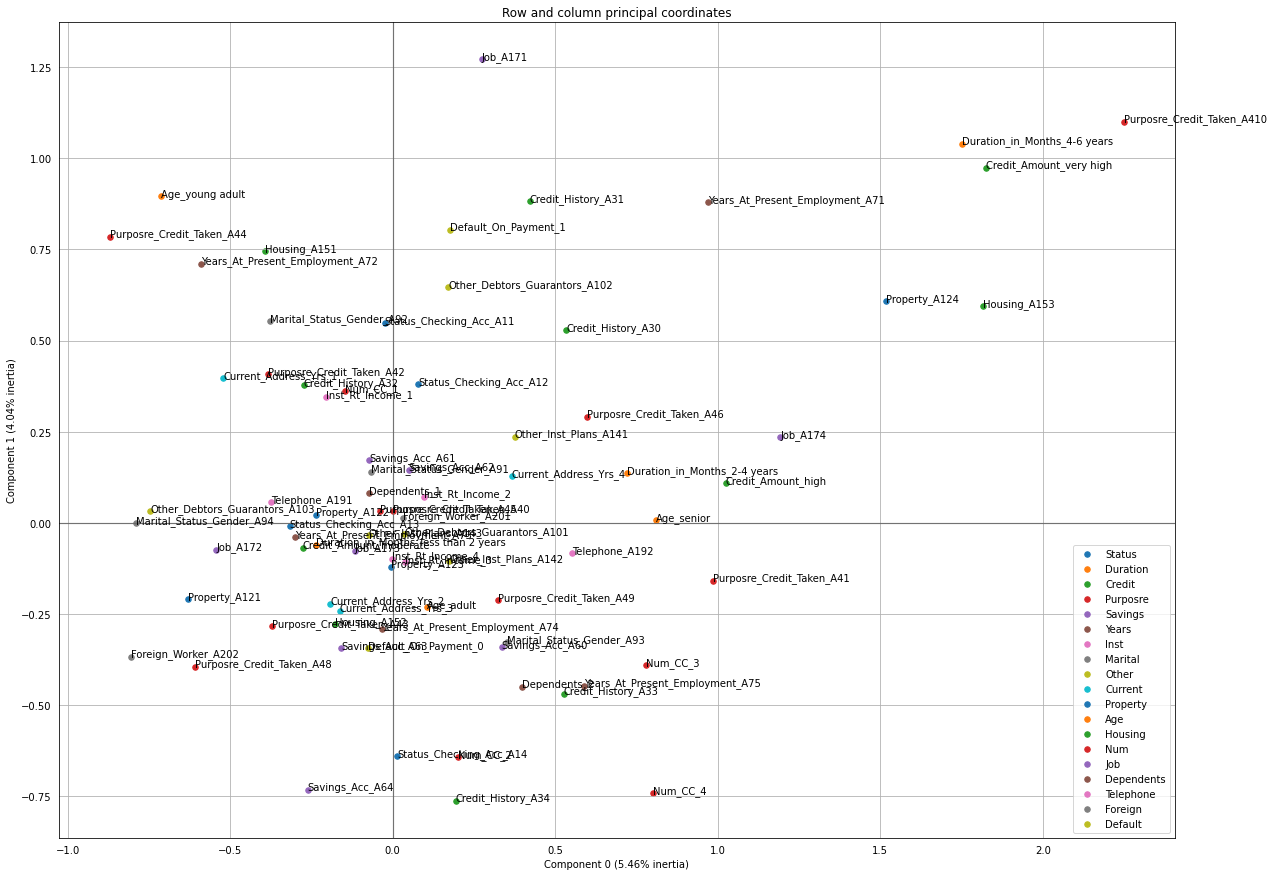

In [ ]:
mca.plot_coordinates(df_mca,
                     row_points_alpha=0.2,
                     figsize=(20, 15),
                     show_row_points=False,
                     show_column_labels=True
                    );

On the one hand, we notice that the people at risk of bank default are tenants (A151), co-applicants (A102), overdrawn customers (A11) as well as those who have repaid all bank loans (A31).
On the other hand, people who are more likely not to end up in bank default are those with a savings account with a value of between 5,000 and 10,000 USD (A63), people who have spent 4 to 7 years in their current job (A74), having taken out credit for a radio/television (A74), owners of their accommodation (A152), adults aged between 25 and 55 and those who have stayed at their current address for 2 or 3 years.